### 1. Let’s import the libraries.

In [63]:
%matplotlib inline
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

### 2. Import the dataset.

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


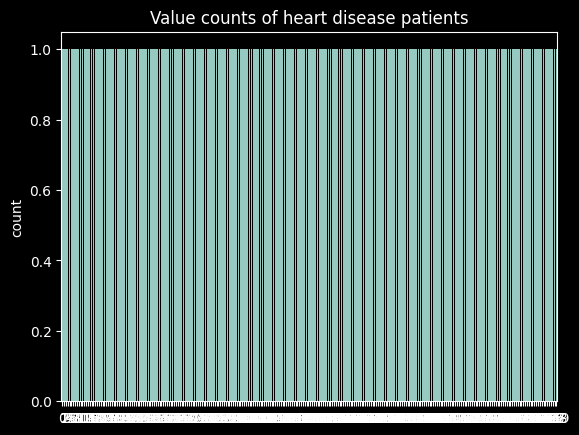

In [64]:
df = pd.read_csv('heart.csv')

print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

### 3. Putting Feature Variable to X and Target variable to y.

In [65]:
# Putting feature variable to X
X = df.drop('heart disease', axis=1)
# Putting response variable to y
y = df['heart disease']

### 4. Train-Test-Split is performed

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

### 5. Let’s import RandomForestClassifier and fit the data.

In [94]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [68]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

### 6. Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [69]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [71]:
grid_search.best_score_

0.6985815602836879

In [72]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator, as shown. The best set of parameters identified was `max_depth = 5`, `min_samples_leaf = 10`, `n_estimators = 10`

### 7. Now, let’s visualize

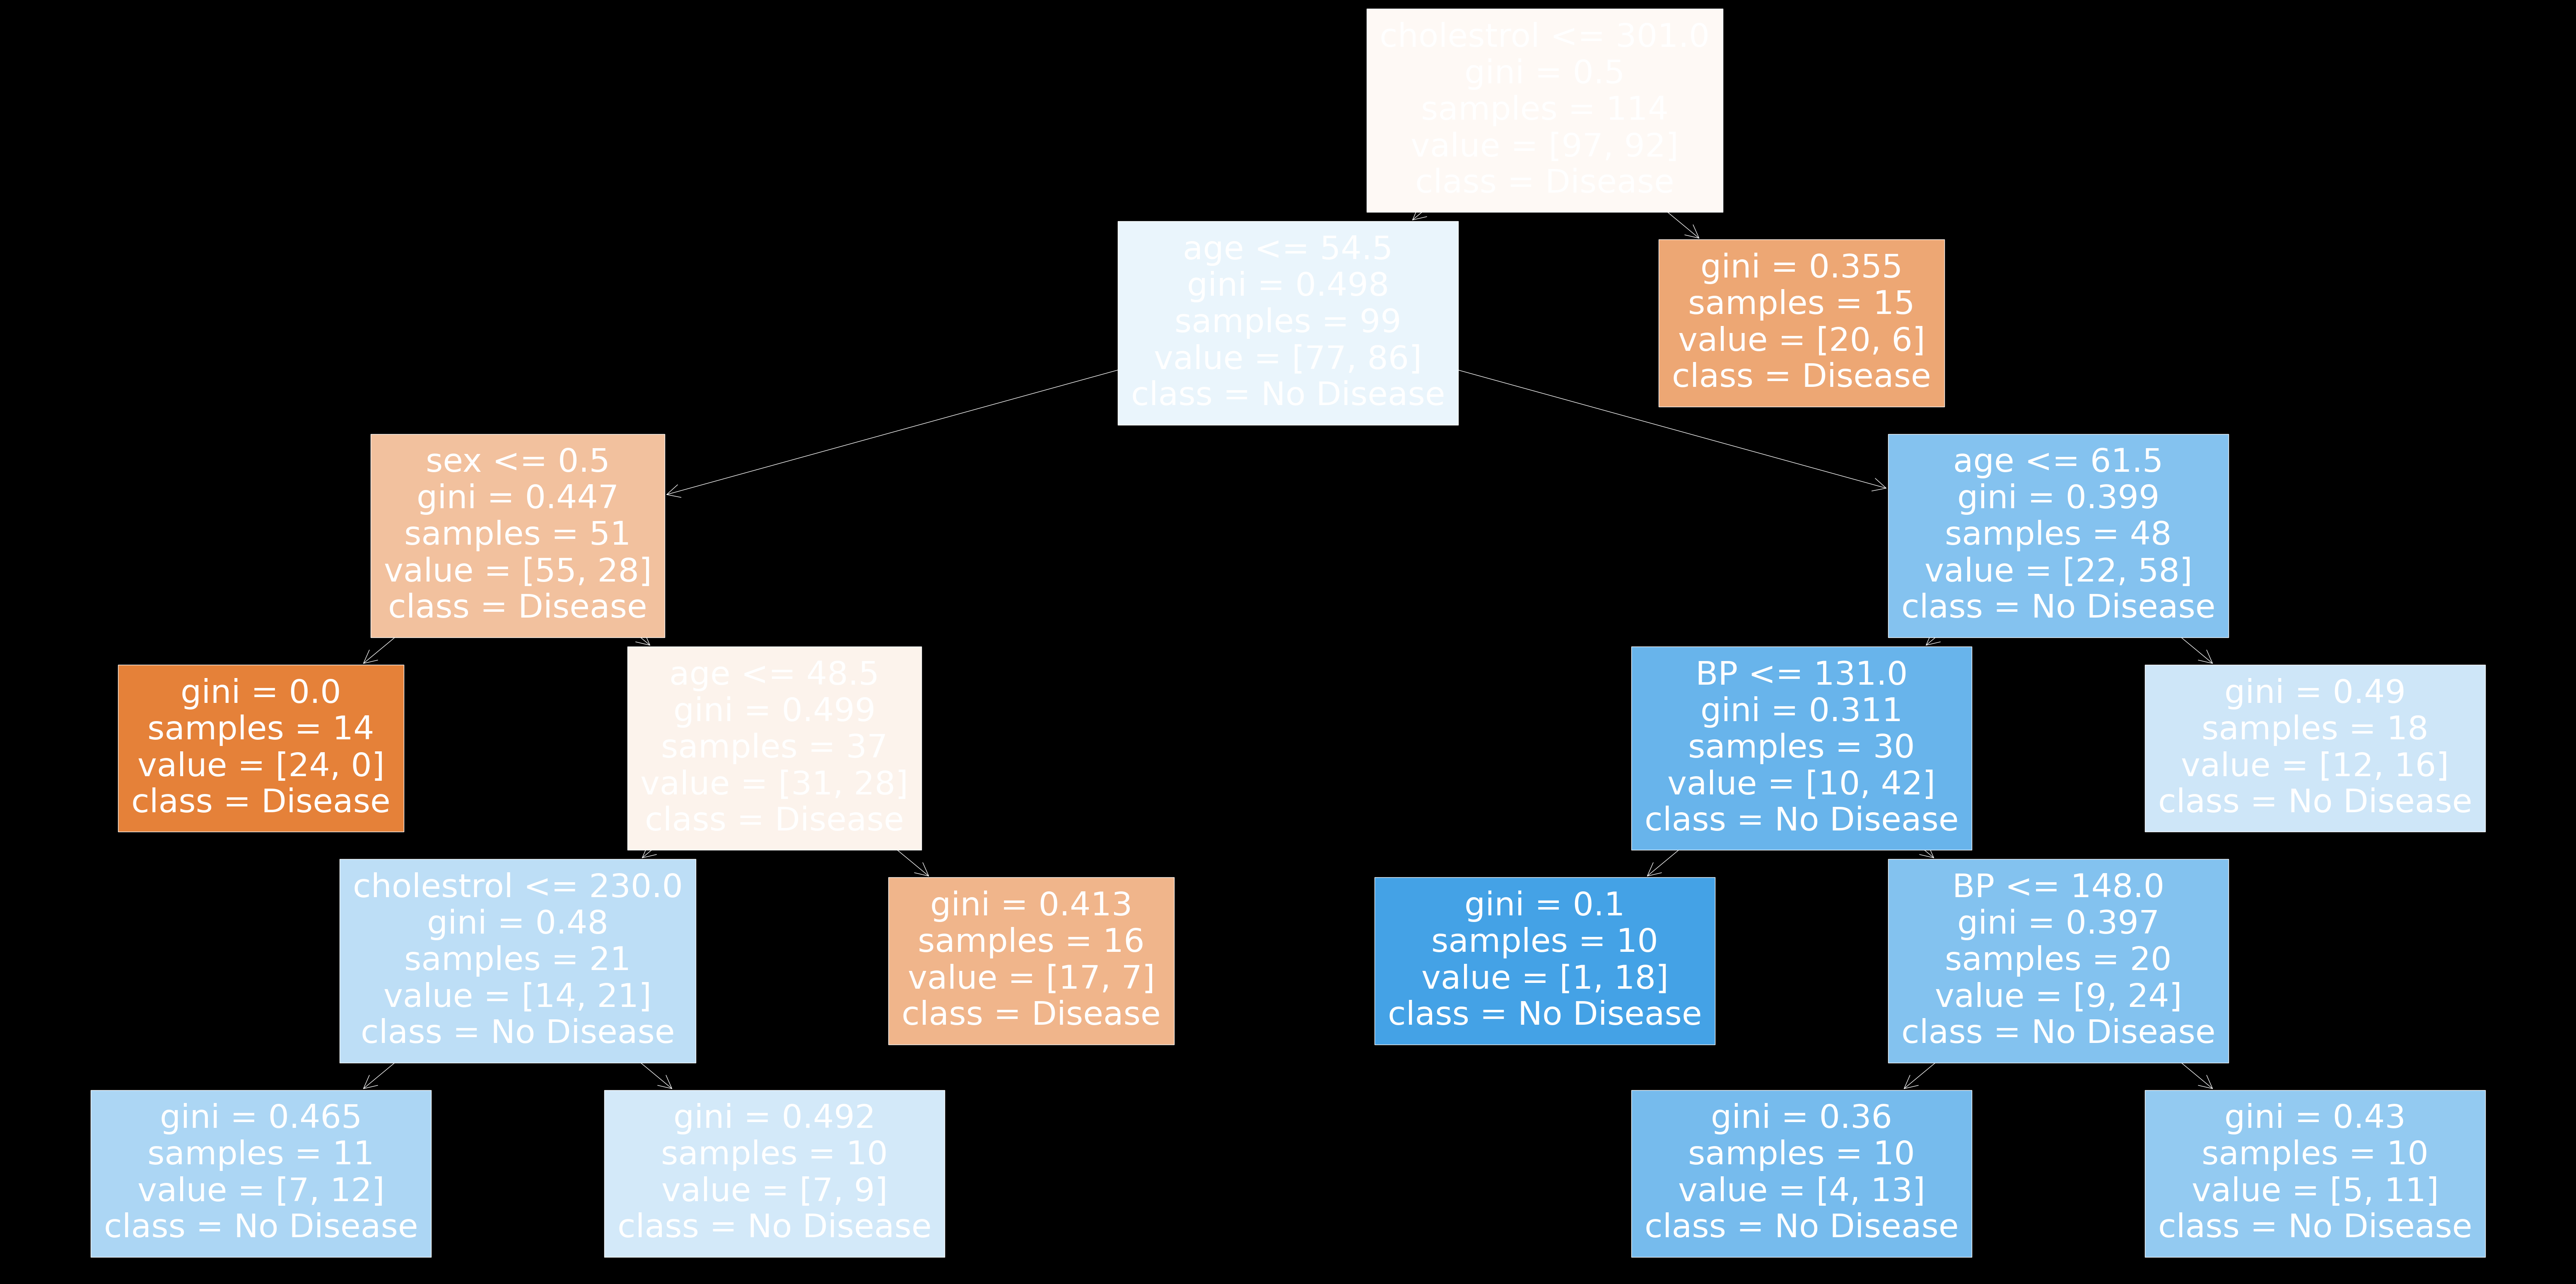

In [91]:
plt.figure(figsize=(80,40))

plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

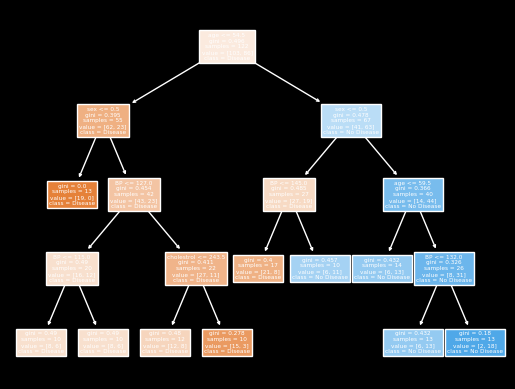

In [90]:
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

The trees created by estimators_[`5`] and estimators_[`7`] are different. Thus we can say that each tree is independent of the other.

### 8. Now let’s sort the data with the help of feature importance

In [92]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [93]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
